# Google Advanced Data Analytics: TikTok Projects

### Author: Jimmy Su

### Date: 2023-10-11

## Document Outline

1. Introduction & Objective
2. Exploratory Data Analysis
3. Statistical Testing
4. Logistic Regression Model for Author Verified Status
5. Machine Learning Models for Classification
6. Summary & Recommendations
7. Appendix

## 1. Introduction & Objective

Description from the Google Advanced Data Analytics Certificate Program:
> TikTok users have the ability to report videos and comments that contain user claims. These reports identify content that needs to be reviewed by moderators. This process generates a large number of user reports that are difficult to address quickly.

> TikTok is working on the development of a predictive model that can determine whether a video contains a claim or offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

This notebook will cover each of the end-of-course projects as a demonstration of skills gained through the certificate program.

## 2. Exploratory Data Analysis (EDA)

### 2.1. Import Packages and Data

In [1]:
# Import relevant packages
import numpy as np
import pandas as pd

In [2]:
# Load the dataset into a DataFrame
data = pd.read_csv("../input/googleadvanceddataanalytics-tiktok-dataset/tiktok_dataset.csv")

### 2.2. Inspect the Data

In [3]:
# Get the shape of the data
data.shape

(19382, 12)

In [4]:
# Display the first several rows of the DataFrame
data.head(n = 10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


In [5]:
# Get summary info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [6]:
# Get summary statistics of the data
data.describe(include = "all")

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,19084,1.938200e+04,19382.000000,19084,19382,19382,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,18142,15663,NaN,NaN,NaN,NaN,NaN
mean,9691.500000,NaN,5.627454e+09,32.421732,NaN,NaN,NaN,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,NaN,2.536440e+09,16.229967,NaN,NaN,NaN,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,NaN,1.234959e+09,5.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,NaN,3.430417e+09,18.000000,NaN,NaN,NaN,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,NaN,5.618664e+09,32.000000,NaN,NaN,NaN,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,NaN,7.843960e+09,47.000000,NaN,NaN,NaN,504327.000000,125020.000000,18222.000000,1156.250000,292.000000


### 2.3. Initial EDA & Calculations

In [7]:
# Investigate the class balance for the `claim_status` variable
data["claim_status"].value_counts()

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

The `claim_status` variable is well balanced. This will make future modeling easier.

In [8]:
# Determine the average view counts of videos with a "claim" status
data_claims = data[data["claim_status"] == "claim"]  # use a Boolean mask to subset data
print("Mean:", "%.2f" % data_claims["video_view_count"].mean())
print("Median:", data_claims["video_view_count"].median())

Mean: 501029.45
Median: 501555.0


In [9]:
# Determine the average view counts of videos with an "opinion" status
data_opinions = data[data["claim_status"] == "opinion"]  # use a Boolean mask to subset data
print("Mean:", "%.2f" % data_opinions["video_view_count"].mean())
print("Median:", data_opinions["video_view_count"].median())

Mean: 4956.43
Median: 4953.0


It is clear that the mean and median view counts for videos classified as "claim" are much higher than the counts for videos classified as "opinion".

In [10]:
# Determine counts for each group combination of `claim_status` 
# and `author_ban_status`
data.groupby(["claim_status", "author_ban_status"])["#"].count()

claim_status  author_ban_status
claim         active               6566
              banned               1439
              under review         1603
opinion       active               8817
              banned                196
              under review          463
Name: #, dtype: int64

It appears that videos classified as "claim" have a greater tendency to be posted by authors that have are "banned" or "under review" in comparison to videos that have been classified as "opinion".

In [11]:
# Calculate the median video share count of `author_ban_status`
data.groupby("author_ban_status")["video_share_count"].median()

author_ban_status
active            437.0
banned          14468.0
under review     9444.0
Name: video_share_count, dtype: float64

In [12]:
# Calculate the count, mean, and median of engagement columns
# grouped by `author_ban_status`
data.groupby(["author_ban_status"]).agg({"video_view_count" : ["count", "mean", "median"],
                                         "video_like_count": ["mean", "median"],
                                         "video_share_count": ["mean", "median"]})

video_view_count                          video_like_count  \
                             count           mean    median             mean   
author_ban_status                                                              
active                       15383  215927.039524    8616.0     71036.533836   
banned                        1635  445845.439144  448201.0    153017.236697   
under review                  2066  392204.836399  365245.5    128718.050339   

                            video_share_count           
                     median              mean   median  
author_ban_status                                       
active               2222.0      14111.466164    437.0  
banned             105573.0      29998.942508  14468.0  
under review        71204.5      25774.696999   9444.0

It is apparent that although "banned" and "under review" authors compose fewer total users than "active" ones, they garner greater numbers of views, likes, and shares.

In [13]:
# Feature extraction exercise
# Create new columns to better understand engagement rates:
# `likes_per_view`, `comments_per_view`, and `shares_per_view`

data_eng = data.copy()

data_eng["likes_per_view"] = data["video_like_count"] / data["video_view_count"]
data_eng["comments_per_view"] = data["video_comment_count"] / data["video_view_count"]
data_eng["shares_per_view"] = data["video_share_count"] / data["video_view_count"]

# Compile information to calculate the count, mean, and median
# grouped by `claim_status` and `author_ban_status`
data_eng.groupby(["claim_status", "author_ban_status"]).agg({"likes_per_view" : ["count", "mean", "median"],
                                                            "comments_per_view": ["mean", "median"],
                                                            "shares_per_view": ["mean", "median"]})

likes_per_view                      \
                                        count      mean    median   
claim_status author_ban_status                                      
claim        active                      6566  0.329542  0.326538   
             banned                      1439  0.345071  0.358909   
             under review                1603  0.327997  0.320867   
opinion      active                      8817  0.219744  0.218330   
             banned                       196  0.206868  0.198483   
             under review                 463  0.226394  0.228051   

                               comments_per_view           shares_per_view  \
                                            mean    median            mean   
claim_status author_ban_status                                               
claim        active                     0.001393  0.000776        0.065456   
             banned                     0.001377  0.000746        0.067893   
             under review               0.001367  0.000789        0.065733   
opinion      active                     0.000517  0.000252        0.043729   
             banned                     0.000434  0.000193        0.040531   
             under review               0.000536  0.000293        0.044472   

                                          
                                  median  
claim_status author_ban_status            
claim        active             0.049279  
             banned             0.051606  
             under review       0.049967  
opinion      active             0.032405  
             banned             0.030728  
             under review       0.035027

It appears that video engagement is more tied to `claim_status` than `author_ban_status` where videos classified as "claim" receive more likes, comments, and shares regardless of `author_ban_status`. 

### 2.4. EDA & Visualizations

In [14]:
# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

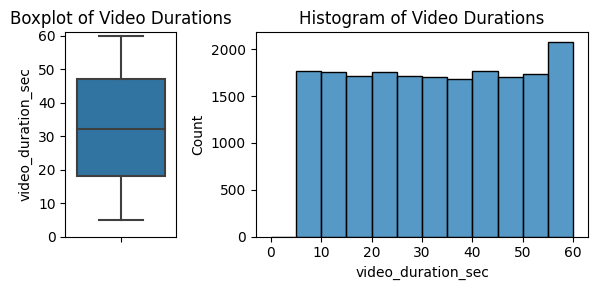

In [15]:
# Create a boxplot and histogram to visualize the distribution of `video_duration_sec`

fig, ax = plt.subplots(1, 2, width_ratios = [1, 3], figsize = (6, 3))

sns.boxplot(data = data,
            y = "video_duration_sec",
            showfliers = True,
            ax = ax[0])
ax[0].set_title("Boxplot of Video Durations")
ax[0].set_ylim(0, 61)

sns.histplot(data = data,
             x = "video_duration_sec",
             bins = range(0, 61, 5),
             ax = ax[1])
ax[1].set_title("Histogram of Video Durations")

fig.tight_layout()
plt.show()

Videos are a maximum of 60 seconds long wit a generally uniform distribution of video duration (with slightly more videos edging towards the 60 second limit).

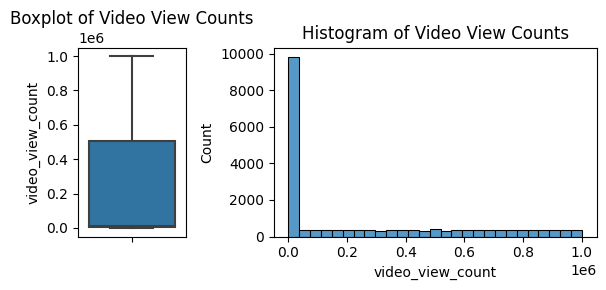

In [16]:
# Create a boxplot and histogram to visualize the distribution of `video_view_count`

fig, ax = plt.subplots(1, 2, width_ratios = [1, 3], figsize = (6, 3))

sns.boxplot(data = data,
            y = "video_view_count",
            showfliers = True,
            ax = ax[0])
ax[0].set_title("Boxplot of Video View Counts")

sns.histplot(data = data,
             x = "video_view_count",
             ax = ax[1])
ax[1].set_title("Histogram of Video View Counts")

fig.tight_layout()
plt.show()

The distribution of video views is highly skewed to the left (low view counts). There are some videos with upwards of one million views ("viral" videos), but the majority of videos fall on the very low end of view counts.

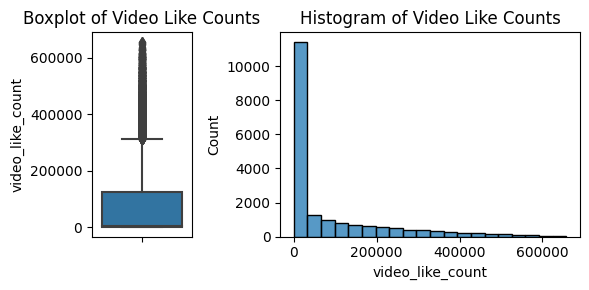

In [17]:
# Create a boxplot and histogram to visualize the distribution of `video_like_count`

fig, ax = plt.subplots(1, 2, width_ratios = [1, 3], figsize = (6, 3))

sns.boxplot(data = data,
            y = "video_like_count",
            showfliers = True,
            ax = ax[0])
ax[0].set_title("Boxplot of Video Like Counts")

sns.histplot(data = data,
             x = "video_like_count",
             bins = 20,
             ax = ax[1])
ax[1].set_title("Histogram of Video Like Counts")

fig.tight_layout()
plt.show()

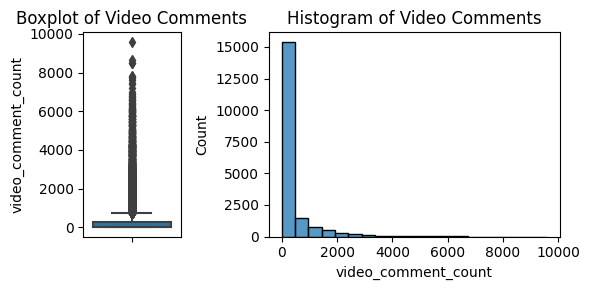

In [18]:
# Create a boxplot and histogram to visualize the distribution of `video_comment_count`

fig, ax = plt.subplots(1, 2, width_ratios = [1, 3], figsize = (6, 3))

sns.boxplot(data = data,
            y = "video_comment_count",
            showfliers = True,
            ax = ax[0])
ax[0].set_title("Boxplot of Video Comments")

sns.histplot(data = data,
             x = "video_comment_count",
             bins = 20,
             ax = ax[1])
ax[1].set_title("Histogram of Video Comments")

fig.tight_layout()
plt.show()

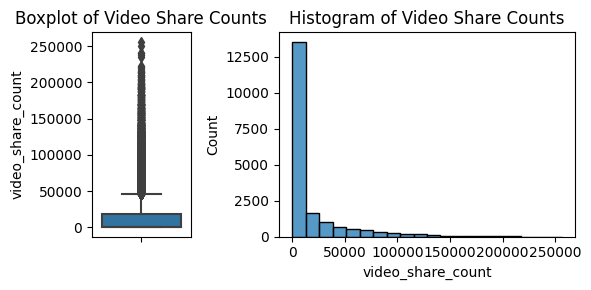

In [19]:
# Create a boxplot and histogram to visualize the distribution of `video_share_count`

fig, ax = plt.subplots(1, 2, width_ratios = [1, 3], figsize = (6, 3))

sns.boxplot(data = data,
            y = "video_share_count",
            showfliers = True,
            ax = ax[0])
ax[0].set_title("Boxplot of Video Share Counts")

sns.histplot(data = data,
             x = "video_share_count",
             bins = 20,
             ax = ax[1])
ax[1].set_title("Histogram of Video Share Counts")

fig.tight_layout()
plt.show()

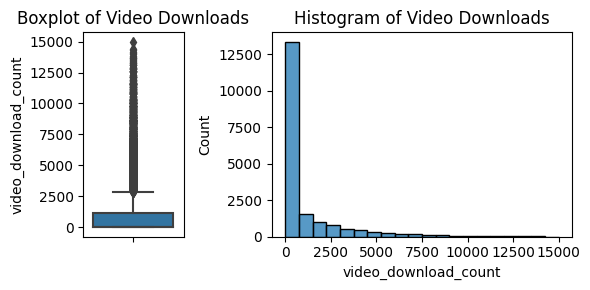

In [20]:
# Create a boxplot and histogram to visualize the distribution of `video_download_count`

fig, ax = plt.subplots(1, 2, width_ratios = [1, 3], figsize = (6, 3))

sns.boxplot(data = data,
            y = "video_download_count",
            showfliers = True,
            ax = ax[0])
ax[0].set_title("Boxplot of Video Downloads")

sns.histplot(data = data,
             x = "video_download_count",
             bins = 20,
             ax = ax[1])
ax[1].set_title("Histogram of Video Downloads")

fig.tight_layout()
plt.show()

The above plots all demonstrate similar trends: distributions of video views, likes, comments, shares, and downloads are all skewed to the left.

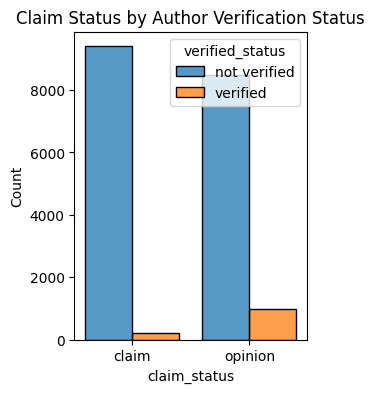

In [21]:
# Create a histogram of `claim_status` by `verification_status`
plt.figure(figsize = (3, 4))
sns.histplot(data = data,
             x = "claim_status",
             hue = "verified_status",
             multiple = "dodge",
             shrink = 0.8)
plt.title("Claim Status by Author Verification Status")
plt.show()

It is clear that there are far fewer "verified" users than "not verified" ones, but if a user *is* verified, they are much more likely to post opinions.

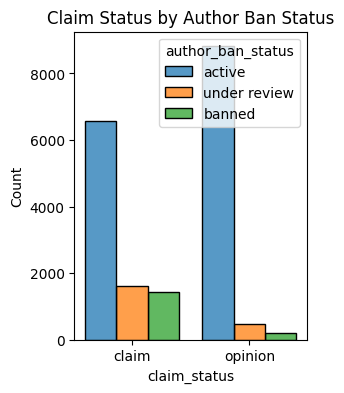

In [22]:
# Create a histogram of `claim_status` by `author_ban_status`
plt.figure(figsize = (3, 4))
sns.histplot(data = data,
             x = "claim_status",
             hue = "author_ban_status",
             hue_order = ["active", "under review", "banned"],
             multiple = "dodge",
             shrink = 0.8)
plt.title("Claim Status by Author Ban Status")
plt.show()

As the numbers previously calculated demonstrated--the proportion of active authors is far greater for videos classified as "opinion" than for videos classified as "claim". Or, phrased in the other way, users who post videos classified as "claim" are more likely to come "under review" or violate the terms of service and be "banned".

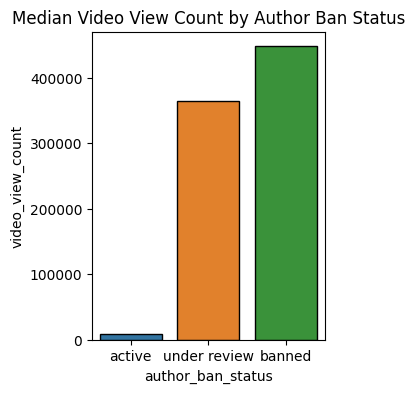

In [23]:
# Create a bar plot of median view counts by ban status
plt.figure(figsize = (3, 4))
sns.barplot(data = data,
            x = "author_ban_status",
            y = "video_view_count",
            order = ["active", "under review", "banned"],
            estimator = "median",
            errorbar = None,
            edgecolor = "black")
plt.title("Median Video View Count by Author Ban Status")
plt.show()

From the above plot, it is apparent that the median view counts for authors that are "banned" or "under review" are much higher than those for authors that are "active".

In [24]:
# Calculate the median view count for claim status.
data.groupby("claim_status")["video_view_count"].median()

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

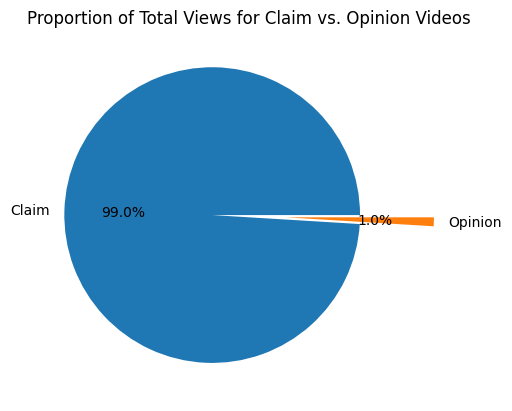

In [25]:
# Create a pie graph depicting the proportions of total views
# by `claim_status`
plt.pie(x = data.groupby("claim_status")["video_view_count"].sum(),
        explode = [0.25, 0.25],
        labels = ["Claim", "Opinion"],
        autopct = "%1.1f%%")
plt.title("Proportion of Total Views for Claim vs. Opinion Videos")
plt.show()

It is clear that a much, much higher proportion of overall view counts are for videos that are classified as "claim"; videos that are classified as "opinion" compose only a very small proportion of total video view counts.

In [26]:
# Determine how many data points in the data set could be considered outliers
# A common way to determine outliers in a normal distribution is through
# the interquartile ranges

cols = ["video_view_count", "video_like_count", "video_share_count",
       "video_download_count", "video_comment_count"]

for col in cols:
    
    percentile_25 = data[col].quantile(0.25)  # 25th percentile
    percentile_75 = data[col].quantile(0.75)  # 75th percentile
    iqr = percentile_75 - percentile_25  # calculate IQR
    
    col_med = data[col].median()  # median of column
    
    threshold = col_med + (1.5 * iqr)  # outlier threshold (upper only)
    
    count_sum = (data[col] > threshold).sum()  # mask + sum Boolean mask
    
    print("Number of outliers in", col, ":", count_sum)

Number of outliers in video_view_count : 2343
Number of outliers in video_like_count : 3468
Number of outliers in video_share_count : 3732
Number of outliers in video_download_count : 3733
Number of outliers in video_comment_count : 3882


Different models handle outliers differently. Therefore, outliers will be handled (*i.e.*, removed) prior to model building in future sections.

*Note*: The template for this project outlined calculating the outliers as 1.5x the interquartile range from the median. However, in the course notes and at a later point in the project, outliers are calculated as 1.5x the interquartile range above and below the first and third quartiles, respectively.

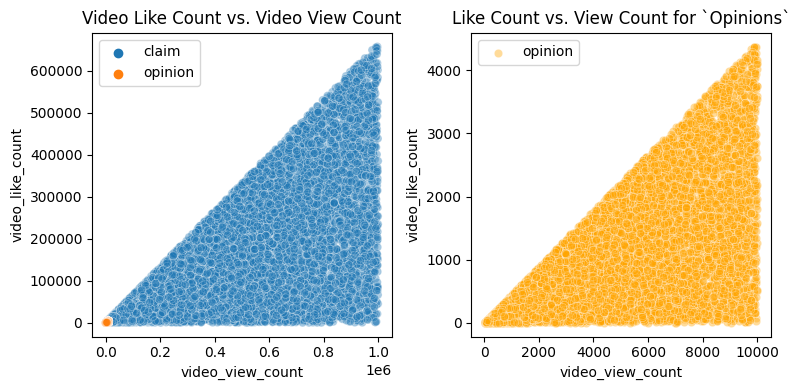

In [27]:
# Create a scatterplot of `video_view_count` vs `video_like_count` 
# according to 'claim_status'

fig, ax = plt.subplots(1, 2, figsize = (8, 4))

sns.scatterplot(data = data,
                x = "video_view_count",
                y = "video_like_count",
                hue = "claim_status",
                alpha = 0.4,
                ax = ax[0])
ax[0].legend()
ax[0].set_title("Video Like Count vs. Video View Count")

sns.scatterplot(data = data[data["claim_status"] == "opinion"],
                x = "video_view_count",
                y = "video_like_count",
                c = "orange",
                alpha = 0.4,
                ax = ax[1])
ax[1].legend(labels = ["opinion"])
ax[1].set_title("Like Count vs. View Count for `Opinions`")

plt.tight_layout()
plt.show()

The above scatterplots confirm that videos classified as "claim" tend to have much higher view and like counts than those videos classified as "opinion".

### 2.5. EDA Summary

The dataset has almost 20,000 entries with 12 attributes. Most of the attributes are numerical, however, four of them are categorical. When looking at `claim_status`, the class balance is balanced, which will make future modeling simpler (assuming missing entries and  outliers that may be removed to not disrupt this balance). Visualizations of data distributions highlight the fact that many of the variables tracking video views, likes, comments, shares, and downloads are highly skewed. This reflects the nature of social media where most content only reaches a small range of people but a few "viral" videos garner a much greater audience. Interestingly, videos that are classified as "claim" appear to receive many more views and likes than videos classified as "opinion". Upon closer inspection, it also appears that users who post videos classified as "claim" are more likely to come "under review" or violate the terms of service and be "banned". However, video engagement appears to be tied more to `claim_status` rather than `author_ban_status` as videos classified as "claim" receive more views, likes, and comments regardless of `author_ban_status`. 

## 3. Statistical Testing

### 3.1. Objective

The objective for this aspect of the project is to determine if there is a statistically significant difference in the number of views for TikTok videos posted by verified accounts versus unverified accounts.

Therefore, the null and alternerative hypotheses are the following: 

* Null Hypothesis (**$H_{0}$**): there is no statistically significant difference between the number of views for TikTok videos posted by verified accounts versus unverified accounts.

* Alternative Hypothesis (**$H_{a}$**): there is a statistically significant difference between the number of views for TikTok videos posted by verified accounts versus unverified accounts.

### 3.2. Data Cleaning

In [28]:
# Import packages for statistical analysis/hypothesis testing
from scipy import stats

In [29]:
# Determine how many rows are missing data
data.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [30]:
# Drop rows with missing values and save as a new dataframe

print("Number of entries prior to cleaning:", data.shape[0])
data_cleaned = data.dropna(axis = 0)
print("Number of entries removed after cleaning:", data.shape[0] - data_cleaned.shape[0])

Number of entries prior to cleaning: 19382
Number of entries removed after cleaning: 298


### 3.3. Hypothesis Testing

Recall the steps for conducting a hypothesis test:
1. State the null and alternative hypotheses
2. Choose a significance level
3. Calculate the p-value
4. Reject or fail to reject the null hypothesis

In [31]:
# Compute the mean `video_view_count` for each group in `verified_status`
data_cleaned.groupby("verified_status")["video_view_count"].mean()

verified_status
not verified    265663.785339
verified         91439.164167
Name: video_view_count, dtype: float64

In [32]:
# Conduct a two-sample t-test to compare means

# Subset data accordingly using Boolean masks
data_cleaned_verified = data_cleaned[data_cleaned["verified_status"] == "verified"]
data_cleaned_unverified = data_cleaned[data_cleaned["verified_status"] == "not verified"]

# Conduct the hypothesis testing to calculate the p-value
tstat, pvalue = stats.ttest_ind(
    a = data_cleaned_verified["video_view_count"],
    b = data_cleaned_unverified["video_view_count"],
    equal_var = False)

print("t-statistic:", tstat)
print("p-value:", pvalue)

t-statistic: -25.499441780633777
p-value: 2.6088823687177823e-120


### 3.4. Results

The calculated p-value of the two-sample *t*-test was: 2.60E-120.

This value is much smaller than the chosen significance level of 0.05 (or 5%). Therefore, the testing rejects the null hypothesis in favor of the alternative hypothesis thereby suggesting that there is a significant difference between the number of views for TikTok videos posted by verified accounts versus unverified accounts.

## 4. Logistic Regression Model for Author Verified Status

### 4.1. Objective

Based on the hypothesis testing performed in the previous section, the objective for this section is to build a logistic regression model to predict user verified status and explore how video characteristics relate to verified users.

A logistic regression model relies on the following assumptions:
* The outcome variable is categorical
* Observations are independent of each other
* There is no severe multicollinearity among predictor variables
* There are no extreme outliers
* A linear relationship between each X variable and the logit of the outcome variable
* There is a sufficiently large sample size

### 4.2. Data Cleaning & Preparation

In [33]:
# Import packages for data preprocessing
import sklearn.utils as utils
from sklearn.model_selection import train_test_split

# Import relevant packages for data modeling
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

In [34]:
# Check for and handle duplicates as necessary
data_cleaned.duplicated().sum()

0

There are no duplicate entries in the dataset.

#### Outliers

Based on the previous boxplots in **2. Exploratory Data Analysis**, the following columns contain outliers:
* `video_like_count`
* `video_comment_count`
* `video_share_count`
* `video_download_count`

However, for this notebook, outliers will only be removed based on the `video_like_count` and `video_comment_count` columns using the interquartile ranges.

In [35]:
# Handle outliers in `video_like_count`

percentile_25 = data_cleaned["video_like_count"].quantile(0.25)
percentile_75 = data_cleaned["video_like_count"].quantile(0.75)
iqr = percentile_75 - percentile_25  # interquartile range

lower_limit = percentile_25 - (1.5 * iqr)
upper_limit = percentile_75 + (1.5 * iqr)

outlier_mask = (data_cleaned["video_like_count"] >= lower_limit) & \
(data_cleaned["video_like_count"] <= upper_limit)

data_logm = data_cleaned[outlier_mask].copy()

print("Entries removed:", data_cleaned.shape[0] - data_logm.shape[0])

Entries removed: 1726


In [36]:
# Handle outliers in `video_comment_count`

percentile_25 = data_cleaned["video_comment_count"].quantile(0.25)
percentile_75 = data_cleaned["video_comment_count"].quantile(0.75)
iqr = percentile_75 - percentile_25  # interquartile range

lower_limit = percentile_25 - (1.5 * iqr)
upper_limit = percentile_75 + (1.5 * iqr)

outlier_mask = (data_logm["video_comment_count"] >= lower_limit) & \
(data_logm["video_comment_count"] <= upper_limit)

pre_removal = data_logm.shape[0]
data_logm = data_logm[outlier_mask].copy()

print("Entries removed:", pre_removal - data_logm.shape[0])

Entries removed: 1664


#### Class Balance & Resampling

Check class balance and use resampling to create class balance, if necessary

In [37]:
# Check class balance for the outcome variable: `verified_status`
print(data_logm["verified_status"].value_counts())
print()
print(data_logm["verified_status"].value_counts(normalize = True))

verified_status
not verified    14568
verified         1126
Name: count, dtype: int64

verified_status
not verified    0.928253
verified        0.071747
Name: proportion, dtype: float64


Approximately 92.8% of the data represents videos posted by unverified accounts and 7.2% represents videos posted by verified accounts. The outcome variable is not extremely unbalanced, but it is unbalanced enough that steps to rebalance classes will be taken.

In [38]:
# Use upsampling to create class balance in the outcome variable

# Identify data from the majority and minority classes
data_verified = data_logm[data_logm["verified_status"] == "verified"]
data_unverified = data_logm[data_logm["verified_status"] == "not verified"]

# Upsample the minority class
data_verified_upsampled = utils.resample(data_verified,
                                         replace = True,  # sample with replacement
                                         n_samples = data_unverified.shape[0],
                                         random_state = 42)

# Concatenate dataframes
data_logm_sampled = pd.concat([data_unverified, data_verified_upsampled], axis = 0)

# Display new class counts
data_logm_sampled["verified_status"].value_counts()

verified_status
not verified    14568
verified        14568
Name: count, dtype: int64

### 4.3. Feature Engineering

In [39]:
# Get the average `video_transcription_text` length for claims and opinions
print("Average length of `video_transcription_text` for claims:", "%.2f" % \
      data_logm[data_logm["claim_status"] == "claim"]["video_transcription_text"].str.len().mean())
print("Average length of `video_transcription_text` for opinions:", "%.2f" % \
      data_logm[data_logm["claim_status"] == "opinion"]["video_transcription_text"].str.len().mean())

Average length of `video_transcription_text` for claims: 95.55
Average length of `video_transcription_text` for opinions: 82.72


In [40]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data_logm_sampled["transcription_text_len"] = data_logm_sampled["video_transcription_text"].str.len()
data_logm_sampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_text_len
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


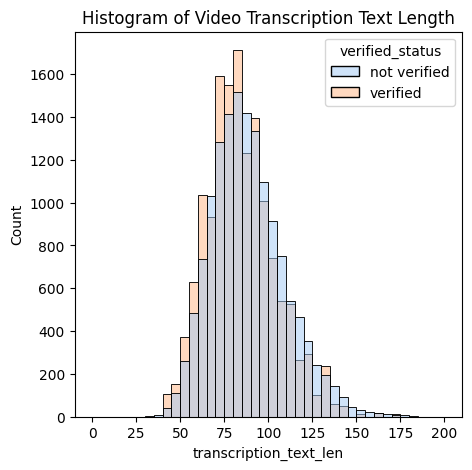

In [41]:
# Visualize the distribution of `video_transcription_text` length
fig = plt.figure(figsize = (5, 5))
sns.histplot(data = data_logm_sampled,
             x = "transcription_text_len",
             hue = "verified_status",
             bins = range(0, 201, 5),
             multiple = "layer",
             palette = "pastel")
plt.title("Histogram of Video Transcription Text Length")
plt.show()

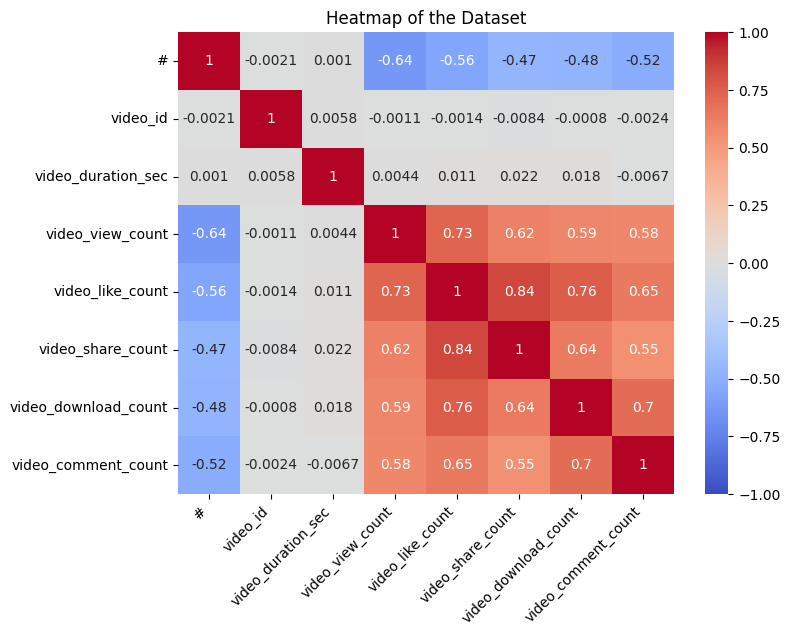

In [42]:
# Generate a correlation heatmap of the variables
# to investigate potential multicollinearity
# and variable relationships with the outcome variable

plt.figure(figsize=(8, 6))
sns.heatmap(data_logm.corr(numeric_only = True),
            annot = True,  # sets annotation to be true 
            cmap = "coolwarm",
            vmin = -1.0,
            vmax = 1.0)
plt.title("Heatmap of the Dataset")
plt.xticks(rotation = 45, horizontalalignment = "right")
plt.show()

Based on the above heatmap and correlation matrix, it appears that `video_view_count`, `video_like_count`, `video_share_count`, `video_download_count`, and `video_comment_count` are all positively correlated with each other. This is not surprising as this, again, is a defining feature of social media and engagement.

### 4.4. Categorical Variable Encoding

Categorical variables must be encoded for model building.

In [43]:
# Encode relevant categorical variables

# Copy dataframe
data_logm_dummies = data_logm_sampled.copy()

# Map outcome variable
data_logm_dummies["verified_status"] = data_logm_dummies["verified_status"].map({"not verified" : False,
                                                                                 "verified" : True})

# Encode other categorical variables as dummy variables
data_logm_dummies = pd.get_dummies(data_logm_dummies,
                                   columns = ["claim_status",
                                              "author_ban_status"],
                                   drop_first = True)

# Display first several rows of new DataFrame
data_logm_dummies.head()

,#,video_id,video_duration_sec,video_transcription_text,verified_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_text_len,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1,7017666017,59,someone shared with me that drone deliveries a...,False,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,2,4014381136,32,someone shared with me that there are more mic...,False,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,3,9859838091,31,someone shared with me that american industria...,False,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,4,1866847991,25,someone shared with me that the metro of st. p...,False,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,5,7105231098,19,someone shared with me that the number of busi...,False,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


### 4.5. Model Building

In [44]:
# Select predictor (X) and outcome (y) variables
y = data_logm_dummies["verified_status"]
X = data_logm_dummies.drop(columns = ["verified_status",  # this is the outcome variable
                                      "#",  # should not impact the model
                                      "video_id",  # should not impact the model
                                      "video_transcription_text"])  # feature was engineered

In [45]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    stratify = y,
                                                    random_state = 42)

In [46]:
# Confirm sizes of training and test sets
print("Training Sets")
print(X_train.shape, y_train.shape)
print()
print("Test Sets")
print(X_test.shape, y_test.shape)

Training Sets
(20395, 10) (20395,)

Test Sets
(8741, 10) (8741,)


In [47]:
# Build the model and fit to the training set
log_clf = LogisticRegression().fit(X_train, y_train)  # clf = "classifier"

### 4.6. Model Evaluation

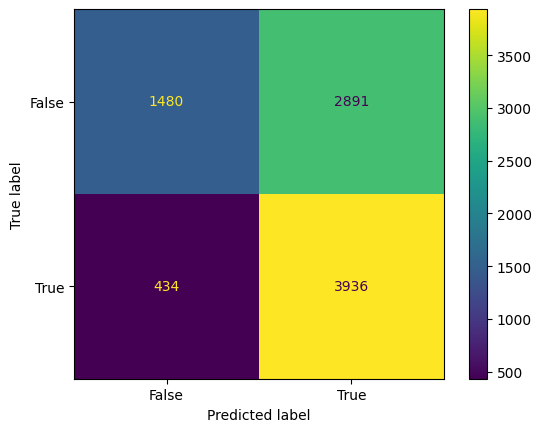

In [48]:
# Use the model to make predictions on the test set
y_pred = log_clf.predict(X_test)

# Compute the values for a confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels = log_clf.classes_)

# Create the confusion matrix display
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                      display_labels = log_clf.classes_)

# Display the plot
disp.plot(values_format = "")  # argument suppresses scientific notation

In [49]:
# Print out classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.77      0.34      0.47      4371
        True       0.58      0.90      0.70      4370

    accuracy                           0.62      8741
   macro avg       0.67      0.62      0.59      8741
weighted avg       0.67      0.62      0.59      8741



Based on the confusion matrix, the logistic regresison model is fairly good at predicting "not verified" users (true positives) but does a poor job of predicting "verified" users (true negatives) as there are many false positives predicted ("not verified" users that are incorrectly predicted to be "verified" by the model). This is reflected in the classification report where the recall score for `True` or "verified" users is 0.90 but the weighted average for both classes is much lower at 0.62.

In [50]:
# Get the feature names from the model and the model coefficients
# (which represent log-odds ratios)
# Place into a DataFrame for readability

import math
pd.DataFrame(data = {"Feature Name" : log_clf.feature_names_in_,
                     "Model Coefficient" : log_clf.coef_[0],
                     "Exponentiated Model Coefficient" : math.e ** log_clf.coef_[0]})

,Feature Name,Model Coefficient,Exponentiated Model Coefficient
0,video_duration_sec,0.001038,1.001039
1,video_view_count,-0.000002,0.999998
2,video_like_count,-0.000004,0.999996
3,video_share_count,0.000008,1.000008
4,video_download_count,-0.000146,0.999854
5,video_comment_count,0.000057,1.000057
6,transcription_text_len,0.002686,1.002689
7,claim_status_opinion,0.000049,1.000049
8,author_ban_status_banned,-0.000001,0.999999
9,author_ban_status_under review,-0.000001,0.999999


### 4.7. Logistic Regression Model Results for User Verified Status

* The dataset has a few strongly correlated variables, which may have resulted in multicollinearity issues that impacted the logistic regression model. Future iterations should explore feature selection and additional feature engineering.
* With weighted accuracy, precision, recall, and F1 scores of 0.62, 0.67, 0.62, and 0.59, respectively, the model demonstrates less than ideal performance. Although the model predicts actual "verified" users with high likelihood, the model also overpredicts "verified" users in general (resulting in a large number of false positives).
* The model coefficients do not offer much insight into classification of `verified_status`. After exponentiation, the coefficients are all relatively close to one, so the impact they have on the final model are appear minimal individually.

## 5. Machine Learning Models for Classification

### 5.1. Objective

This is the final goal of this project: to develop a predictive model for classifying whether a video contains a *claim* or offers an *opinion*. The model has the potential to reduce a backlog of user reports and prioritize them more efficiently. Understanding the features that most impact these predictions will have business and ethical implications as well.

False Negatives vs. False Positives
* If the model predicts a false positive (*i.e.*, the model classifies a video as a "claim" when it does not contain one), the video will undergo additional review and receive greater scrutiny by the TikTok team. Although this may create more work internally for the team that is responsible for reviewing videos, it does not create ethical concerns.
* If the model predicts a false negative (*i.e.*, the model classifies a video as an "opinion" when it actually contains a claim), the video may be missed for review. This could result in content being released to viewers that should be scrutinized more closely and ultimately leads to ethical concerns.

Therefore, the model should limit false negative predictions.

### 5.2. Data Cleaning & Preparation

In [51]:
# Import relevant packages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
import sklearn.metrics as metrics
import pickle

In [52]:
# The data has already been loaded
# Missing and duplicate entries were handled previously
data_cleaned.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Recall some advantages of tree-based machine learning models:
* Require no assumptions regarding the underlying distribution of data
* Handle collinearity well
* Do not require data scaling or normalization
* Decisions are transparent and interpretable
* Handle outliers well

Therefore, outliers do not need to be removed here.

In [53]:
# Check class balance
print(data_cleaned["claim_status"].value_counts())
print()
print(data_cleaned["claim_status"].value_counts(normalize = True))

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64


The class balance of the data is almost 50/50. No rebalancing is required.

### 5.3. Feature Engineering, Variable Encoding, & Variable Selection

In [54]:
# Extract the length of each `video_transcription_text`
# and add this as a column to the dataframe

data_mlm = data_cleaned.copy()
data_mlm["transcription_text_len"] = data_mlm["video_transcription_text"].str.len()
data_mlm.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_text_len
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


In [55]:
# Calculate the average `video_transcription_text` length for claims and opinions
data_mlm.groupby("claim_status")["transcription_text_len"].mean()

claim_status
claim      95.376978
opinion    82.722562
Name: transcription_text_len, dtype: float64

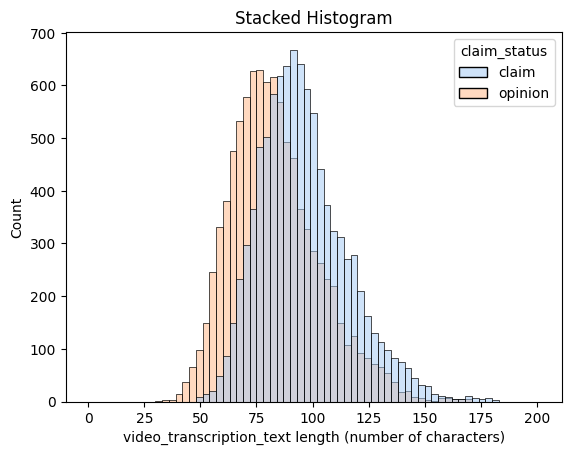

In [56]:
# Visualize the distribution of `video_transcription_text` length for claims and opinions
sns.histplot(data = data_mlm,
             x = "transcription_text_len",
             stat = "count",
             bins = range(0, 202, 3),
             multiple = "layer",
             kde = False,
             palette = "pastel", 
             hue = "claim_status",
             element ="bars",
             legend = True)
plt.title("Stacked Histogram")
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.show()

Note that a correlation matrix heatmap was generated in the previous section (**4. Logistic Regression Model**) and can be referred to there. Because tree-based machine learning models are able to handle multicollinearity well, there is no need to perform intensive feature selection at this stage.

In [57]:
# Variable Encoding

# Map outcome variable
data_mlm["claim_status"] = data_mlm["claim_status"].map({"opinion" : False,
                                                         "claim" : True})

# Encode other categorical variables as dummy variables
data_mlm = pd.get_dummies(data_mlm,
                          columns = ["verified_status",
                                     "author_ban_status"],
                          drop_first = True)

# Display first several rows of new DataFrame
data_mlm.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_text_len,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,True,7017666017,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,2,True,4014381136,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,3,True,9859838091,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,4,True,1866847991,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,5,True,7105231098,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


In [58]:
# Assign variables
y = data_mlm["claim_status"]
X = data_mlm.drop(columns = ["claim_status",
                             "#",
                             "video_id",
                             "video_transcription_text"])

In [59]:
# Split data into training and test sets, 80/20
X_tr, X_test, y_tr, y_test = train_test_split(X,
                                              y,
                                              test_size = 0.20,
                                              stratify = y,
                                              random_state = 42)

In [60]:
# Split the training data into training and validation sets, 75/25 --> 60/20/20 final
X_train, X_val, y_train, y_val = train_test_split(X_tr,
                                                  y_tr,
                                                  test_size = 0.25,
                                                  stratify = y_tr,
                                                  random_state = 42)

In [61]:
# Confirm training, validation, and test sets
print("Training Sets")
print(X_train.shape, y_train.shape, "\n")
print("Validation Sets")
print(X_val.shape, y_val.shape, "\n")
print("Test Sets")
print(X_test.shape, y_test.shape)

Training Sets
(11450, 10) (11450,) 

Validation Sets
(3817, 10) (3817,) 

Test Sets
(3817, 10) (3817,)


### 5.4. Random Forest Model Building & Evaluation

In [62]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state = 42)

# Create a dictionary of hyperparameters to tune
cv_params = {"n_estimators" : [50, 100],
             "max_depth" : [5, 10],
             "min_samples_leaf" : [1, 3],
             "min_samples_split" : [2, 4],
             "max_features" : [5, None]}

# Define a dictionary of scoring metrics to capture
scoring = {"accuracy", "precision", "recall", "f1"}

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf,
                     cv_params,
                     scoring = scoring,
                     cv = 5,  # cross-validation with number of folds
                     refit = "recall",  # score to optimize
                     n_jobs = -1,  # use all processors to run in parallel
                     verbose = 1)  # display computation time for each fold

In [63]:
%%time

# Fit the model
rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
CPU times: user 1.47 s, sys: 263 ms, total: 1.73 s
Wall time: 1min 1s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'max_features': [5, None],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100]},
             refit='recall', scoring={'f1', 'accuracy', 'precision', 'recall'},
             verbose=1)

In [64]:
# Define a path to the folder for saving the model
path = "/kaggle/working/"

In [65]:
# Pickle the model
with open(path+"rf_cv_model.pickle", "wb") as to_write:
    pickle.dump(rf_cv, to_write)

In [66]:
# Open pickled random forest model
with open(path+"rf_cv_model.pickle", "rb") as to_read:
    rf_cv = pickle.load(to_read)

In [67]:
# Print best score
print("Best Average Refit Score (Recall):", "%.5f" % rf_cv.best_score_)

Best Average Refit Score (Recall): 0.98994


In [68]:
# Examine best parameters
rf_cv.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [69]:
# Test the random forest "best estimator" model on the validation data
y_val_pred = rf_cv.best_estimator_.predict(X_val)

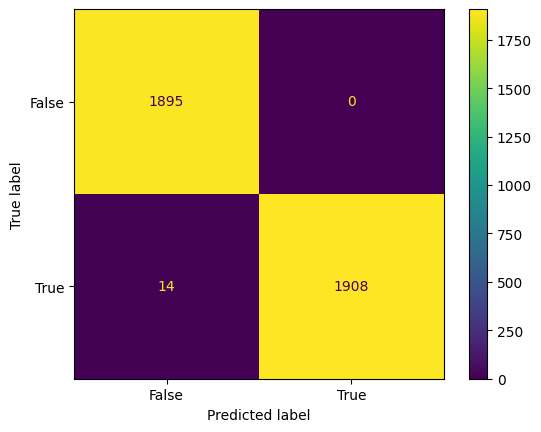

In [70]:
# Compute values for confusion matrix
cm = metrics.confusion_matrix(y_val, y_val_pred)

# Create display of confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                      display_labels = rf_cv.classes_)

# Display plot
disp.plot(values_format = "")  # argument suppresses scientific notation

In [71]:
# Define function for outputting model evaluation results in DataFrame

def classification_report_df(eval_df, model, y_test, y_pred):
    """
    Calculates evaluation metrics of the provided `model` (string) with associated
    `y_test` (true) and `y_pred` (predicted) values and concatenates it
    to the provided DataFrame `eval_df`.
    """
    
    # Calculate evaluation metrics
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    
    # Instantiate evaluation metrics dictionary
    eval_dict = {"Accuracy" : accuracy,
                 "Precision" : precision,
                 "Recall" : recall,
                 "F1 Score" : f1,
                }
    
    # Convert to a DataFrame
    df_to_concatenate = pd.DataFrame(eval_dict, index = [model])
    
    # Concatenate dictionary to provided DataFrame
    eval_df = pd.concat([eval_df, df_to_concatenate])
    
    return eval_df

In [72]:
# Create DataFrame to keep records of evaluated models
eval_df = pd.DataFrame()
eval_df = classification_report_df(eval_df, "Random Forest (Val)", y_val, y_val_pred)
eval_df

,Accuracy,Precision,Recall,F1 Score
Random Forest (Val),0.996332,1.0,0.992716,0.996345


The random forest model performs extremely well--it is great at classifying videos as claims and opinions appropriately. There are no false negatives and very few false positives.

### 5.5. Extreme Gradient Boosted (XGBoost) Model Building & Evaluation

In [73]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective = "binary:logistic",
                    random_state = 42)

# Create a dictionary of hyperparameters to tune
cv_params = {"n_estimators" : [5, 10, 15],
             "max_depth" : [4, 6],
             "min_child_weight" : [3, 5],
             "learning_rate" : [0.1, 0.2, 0.3],
             "subsample" : [0.7],
             "colsample_bytree" : [0.7]}

# Define a dictionary of scoring metrics to capture
scoring = {"accuracy", "precision", "recall", "f1"}

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb,
                      cv_params,
                      scoring = scoring,
                      cv = 5,  # cross-validation with number of folds
                      refit = "recall",  # score to optimize
                      n_jobs = -1,  # use all processors to run in parallel
                      verbose = 1)  # display computation time for each fold

In [74]:
%%time

# Fit the model to training data
xgb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
CPU times: user 569 ms, sys: 80.4 ms, total: 649 ms
Wall time: 6.81 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [4, 6],
                         'min_child_weight': [3, 5],
                         'n_estimators': [5, 10, 15], 'subsample': [0.7]},
             refit='recall', scoring={'f1', 'accuracy', 'precision', 'recall'},
             verbose=1)

In [75]:
# Pickle the model
with open(path+"xgb_cv_model.pickle", "wb") as to_write:
    pickle.dump(xgb_cv, to_write)

In [76]:
# Open pickled XGBoost model
with open(path+"xgb_cv_model.pickle", "rb") as to_read:
    xgb_cv = pickle.load(to_read)

In [77]:
# Print best score
print("Best Average Refit Score (Recall):", "%.5f" % xgb_cv.best_score_)

Best Average Refit Score (Recall): 0.98976


In [78]:
# Examine best parameters
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 3,
 'n_estimators': 5,
 'subsample': 0.7}

In [79]:
# Test the XGBoost "best estimator" model on the validation data
y_val_pred = xgb_cv.best_estimator_.predict(X_val)

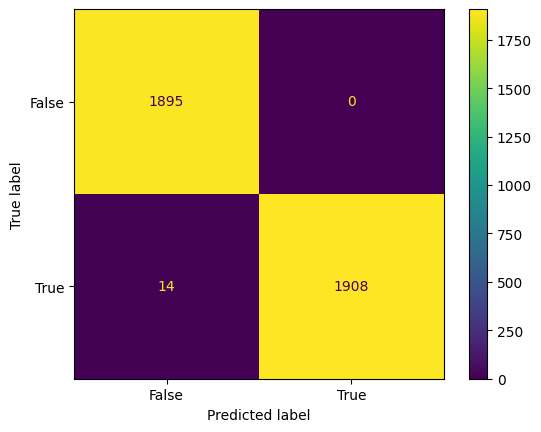

In [80]:
# Compute values for confusion matrix
cm = metrics.confusion_matrix(y_val, y_val_pred)

# Create display of confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                      display_labels = xgb_cv.classes_)

# Display plot
disp.plot(values_format = "")  # argument suppresses scientific notation

In [81]:
# Add model evaluation to DataFrame
eval_df = classification_report_df(eval_df, "XGBoost (Val)", y_val, y_val_pred)
eval_df

,Accuracy,Precision,Recall,F1 Score
Random Forest (Val),0.996332,1.0,0.992716,0.996345
XGBoost (Val),0.996332,1.0,0.992716,0.996345


The random XGBoost model also performs extremely well. In fact, against the validation set, it performs similarly as well as the random forest model. Therefore, both models will be tested against the test dataset for final evaluation.

### 5.6. Champion Model Evaluation

Since both models performed exactly the same on the validation dataset using the metrics recorded, both models will be evaluated against the test dataset. Although this is not the standard workflow for model evaluation, it will be informative for the purposes of this project.

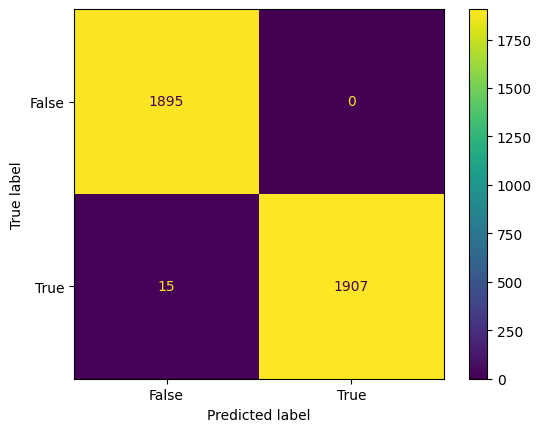

In [82]:
# Random Forest Confusion Matrix

# Run the random forest "best estimator" model on the test data
y_pred_rf = rf_cv.best_estimator_.predict(X_test)

# Compute values for confusion matrix and display
cm = metrics.confusion_matrix(y_test, y_pred_rf)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                      display_labels = rf_cv.classes_)
disp.plot(values_format = "")

In [83]:
# Random Forest Evaluation
eval_df = classification_report_df(eval_df, "Random Forest (Test)", y_test, y_pred_rf)
eval_df

,Accuracy,Precision,Recall,F1 Score
Random Forest (Val),0.996332,1.0,0.992716,0.996345
XGBoost (Val),0.996332,1.0,0.992716,0.996345
Random Forest (Test),0.996070,1.0,0.992196,0.996083


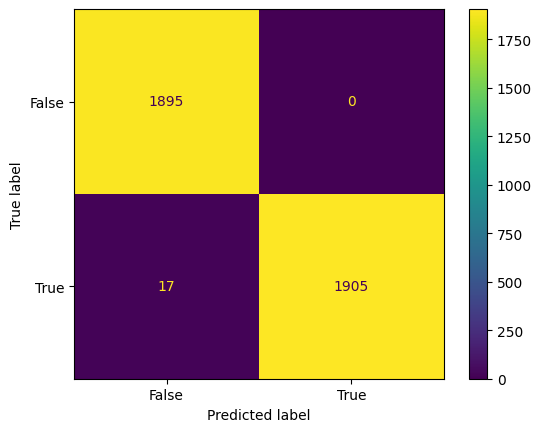

In [84]:
# XGBoost Confusion Matrix

# Run the random forest "best estimator" model on the test data
y_pred_xgb = xgb_cv.best_estimator_.predict(X_test)

# Compute values for confusion matrix and display
cm = metrics.confusion_matrix(y_test, y_pred_xgb)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                      display_labels = xgb_cv.classes_)
disp.plot(values_format = "")

In [85]:
# XGBoost Evaluation
eval_df = classification_report_df(eval_df, "XGBoost (Test)", y_test, y_pred_xgb)
eval_df

,Accuracy,Precision,Recall,F1 Score
Random Forest (Val),0.996332,1.0,0.992716,0.996345
XGBoost (Val),0.996332,1.0,0.992716,0.996345
Random Forest (Test),0.996070,1.0,0.992196,0.996083
XGBoost (Test),0.995546,1.0,0.991155,0.995558


Against the test dataset, both the random forest and XGBoost models again perform similarly well, but the random forest model performs ever so slightly better. Therefore, the random forest model will be considered the champion model!

Finally, the features from the champion model will be investigated.

Text(0.5, 0, 'Mean Decrease in Gini Impurity')

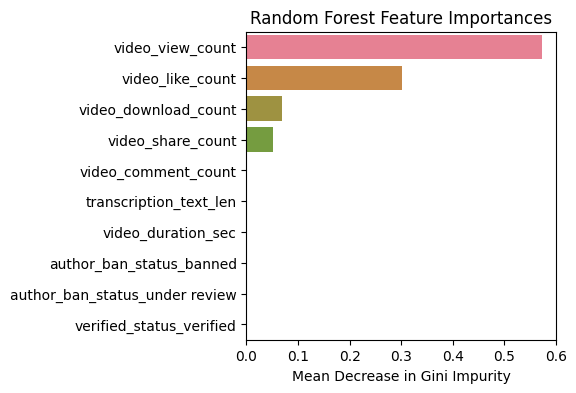

In [86]:
# Plot feature importances

importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index = X_train.columns).sort_values(ascending = False)

fig = plt.figure(figsize = (4, 4))
sns.barplot(y = rf_importances.index,
            x = rf_importances.values,
            palette = "husl")
plt.title("Random Forest Feature Importances")
plt.xlabel("Mean Decrease in Gini Impurity")

From the above plot of feature importances, it is clear that the most predictive features are all related to audience engagement.

### 5.7. Results

Both of the machine learning models built here, a random forest model and an extreme gradient boosted model, performed extremely well against the holdout test dataset. Ultimately, the random forest model performed ever so slightly better and is considered the champion model. The model's most predictive features were all related to audience engagement levels (`video_view_count`, `video_like_count`, `video_download_count`, and `video_share_count`), suggesting that the model classifies videos based on the values each entry has for these variables. The models built here perform well enough that there is no need for additional hyperparameter tuning or feature engineering; however, additional evaluation with any further data is recommended prior to deployment.

## 6. Summary & Recommendations

The goal of this project was to develop a predictor model to classify user-reported TikTok videos as "claim" or opinion".
* Exploratory data analysis revealed that distributions of several variables or features in the dataset were highly skewed, which reflects the nature of social media. Videos that have been classified as "claim" appeared to receive greater attention than those that have been classified as "opinion".
* Statistical analysis revealed that there is a significant difference between the number of views for videos posted by verified accounts versus unverified accounts; however, a logistic regression model failed to perform very well in classifying "verified" users versus "not verified". Referring back to the exploratory data anlysis, it appeared that video engagement was more tied to `claim_status` than `author_ban_status`, which together may suggest a similar relationship between `claim_status` and `verified_status`.
* Two strong tree-based ensemble machine learning models were built to classify future videos as "claim" or "opinion", and from the champion model it was confirmed that the model's most predictive features were all related to video engagement. The more views, likes, downloads, and shares a video received, the more likely it was to be classified as a "claim".
* The models built here perform well enough that there is no need for additional hyperparameter tuning or feature engineering; however, additional evaluation with any further data is recommended prior to deployment. Monitoring of the model results post-deployment is recommended to ensure the model is robust to potential fluctuations in video engagement, which drive the most predictive features of the model.

## 7. Appendix

* Analyses were completed in **Python** 3: Van Rossum G and Drake FL. *Python 3 Reference Manual.* (2009) Scotts Valley, CA: CreateSpace.

* Analyses were completed with the help of the following Python libraries and packages:
    - Van Rossum G. "The Python Library Reference." *Python Software Foundation* (2020).
    - Harris CR, Millman KJ, van der Walt SJ, *et al*. "Array programming with **NumPy**." *Nature* **585** (2020): 357–362. DOI: [10.1038/s41586-020-2649-2](https://www.nature.com/articles/s41586-020-2649-2).
    - The pandas development team. "pandas-dev/**pandas**: Pandas." *Zenodo* (2020). DOI: [10.5281/zenodo.3509134](https://doi.org/10.5281/zenodo.3509134) and McKinney W. "Data structures for statistical computing in Python." *Proceedings of the 9th Python in Science Conference* **445** (2010): 56-61. DOI: [10.25080/Majora-92bf1922-00a](https://doi.org/10.25080/Majora-92bf1922-00a).
    - Hunter JD. "**Matplotlib**: a 2D graphics environment." *Computing in Science & Engineering* **9** (2007): 90-95. DOI: [10.5281/zenodo.592536](https://doi.org/10.5281/zenodo.592536).
    - Waskom ML. "**seaborn**: statistical data visualization." *Journal of Open Source Software* **6** (2021): 3021. DOI: [10.21105/joss.03021](https://doi.org/10.21105/joss.03021).
    - Pedregosa F, Varoquaux G, Gramfort A, Michel V, Thirion B, Grisel O, Blondel M, Prettenhoger P, Weiss R, Dubourg V, Vanderplas J, Passos A, Cournapeau D, Brucher M, Perrot M, and Duchesney E. "**scikit-learn**: machine learning in Python." *Journal of Machine Learning Research* **12** (2011): 2825-2830. DOI: [10.5555/1953048.2078195](https://doi.org/10.5555/1953048.2078195).
    - Chen T and Guestrin C. "**XGBoost**: a scalable tree boosting system." *Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining* (2016): 785-794. DOI: [10.1145/2939672.2939785](https://doi.acm.org/10.1145/2939672.2939785)